In [67]:
import numpy as np
import matplotlib
import pandas as pd

In [68]:
dataset = pd.read_csv('/Users/wzhang/Downloads/lake_erie_habs_W4_6_8_9_12_13_16_2013-2020.xlsx - HAB_data (1).csv')

In [69]:
print(dataset)

          Date  Site  Latitude (decimal deg)  Longitude (decimal deg)  \
0    5/29/2013   WE6                 41.7134                 -83.3804   
1    5/29/2013   WE8                 41.8343                 -83.3633   
2    5/29/2013   WE4                 41.8267                 -83.1930   
3    6/10/2013   WE6                 41.7144                 -83.3805   
4    6/10/2013   WE8                 41.8353                 -83.3631   
..         ...   ...                     ...                      ...   
834  10/5/2020   WE9                 41.7176                 -83.4239   
835  10/5/2020  WE16                 41.6599                 -83.1468   
836  10/5/2020  WE13                 41.7436                 -83.1526   
837  10/5/2020  WE12                 41.7040                 -83.2552   
838  10/5/2020   WE4                 41.8267                 -83.1947   

     Secchi Depth (m)  CTD Temperature (°C)  \
0                 1.6                  18.5   
1                 1.0        

In [70]:
train = dataset.iloc[:743,:]
test = dataset.iloc[743:,:]
print(train)
print(test)
X_train = pd.DataFrame(train.iloc[:,4:15].values)
Y_train = train.iloc[:,16:].values
print(X_train.shape)
print(Y_train.shape)
X_test = pd.DataFrame(test.iloc[:,4:15].values)
X_test_shap = pd.DataFrame(test.iloc[:,4:15])
Y_test = test.iloc[:,16:].values
print(X_test.shape)
print(Y_test.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


          Date  Site  Latitude (decimal deg)  Longitude (decimal deg)  \
0    5/29/2013   WE6                 41.7134                 -83.3804   
1    5/29/2013   WE8                 41.8343                 -83.3633   
2    5/29/2013   WE4                 41.8267                 -83.1930   
3    6/10/2013   WE6                 41.7144                 -83.3805   
4    6/10/2013   WE8                 41.8353                 -83.3631   
..         ...   ...                     ...                      ...   
738  10/7/2019  WE16                 41.6599                 -83.1467   
739  10/7/2019  WE13                 41.7428                 -83.1354   
740  10/7/2019  WE12                 41.7023                 -83.2639   
741  10/7/2019   WE4                 41.8270                 -83.1949   
742  6/16/2020   WE6                 41.7054                 -83.3864   

     Secchi Depth (m)  CTD Temperature (°C)  \
0                1.60                  18.5   
1                1.00        

In [71]:
import tensorflow as tf

In [72]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import mean
from numpy import std

In [73]:
model = Lasso(alpha=0.01)

In [74]:
model.fit(X_train_scaled,Y_train)

Lasso(alpha=0.01)

In [75]:
res = model.predict(X_test_scaled)
print(res)

[  9.67808561  26.87759403  24.74743864  40.79451484  38.23446189
  49.2381228   28.89647542  26.34977808  14.8087073   55.08504965
  -9.02709731  50.18534322  18.28525226  37.70193008  25.99797146
  48.65056491   8.27776254  48.40201182  30.41192967  39.23290638
  11.58283492  51.17275823   6.763499    18.61777416  23.22514696
  21.70535962  53.81222206  34.25990798  53.11480601  27.55538329
  30.61366554  48.07390209  12.12681021  61.49440282  40.62146312
  59.72453008  19.75537514  21.45428251  46.41759872   7.27719951
  49.50969217  38.33764775  70.78207517  38.90185153  33.55663943
  33.86659289  19.56160626  43.01220837  34.79931172  66.36761923
  29.90480486  24.42658329  22.09083923  17.5669813   41.61634663
  38.90420014  52.86651359  30.97814153  14.28970417  38.5965699
  18.93011876  38.47544326  27.8353905   43.73974428  30.80684707
  19.83967596  35.22156709   8.70070261  42.38670552  36.13857323
  35.45042014  30.09560586  17.84834255  36.43500391  -4.71721016
  42.202845

In [76]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, res) 
print(r2)

0.42278360412977634


In [77]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,res)
print(mae)

11.590295655637064


In [78]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y_test,res)
print(mape)

1.3670853976827566


In [79]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test,res)
print(rmse)

13.906688558510261


In [80]:
features = pd.DataFrame(dataset.iloc[:,4:15])
features = features.columns
print(features)

Index(['Secchi Depth (m)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)', 'CTD Dissolved Oxygen (mg/L)',
       'Turbidity (NTU)', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')


In [81]:
import shap

In [82]:
print(X_test)

     0     1      2     3      4      5      6      7      8     9     10
0   0.2  20.6  309.0  7.68  57.20  22.70   7.86  36.56  0.707  0.56  0.15
1   0.2  21.7  442.4  7.02  41.30  52.74  13.00  59.00  0.701  1.97  0.42
2   0.2  20.2  259.3  7.69  35.80  90.23  25.36  45.80  1.870  0.58  0.07
3   1.1  24.9  353.0  8.68   6.80  31.78   7.23  28.74  0.914  0.52  0.11
4   1.6  24.3  301.0  9.64   5.38  26.70   8.87  44.73  0.807  0.66  0.15
..  ...   ...    ...   ...    ...    ...    ...    ...    ...   ...   ...
91  0.8  14.4  313.1  9.00   9.38  47.68  18.77  20.71  0.069  0.98  0.17
92  1.8  15.4  249.6  8.90   3.48  22.20   8.86  20.53  0.105  0.46  0.09
93  1.8  15.7  221.3  8.97   2.30  14.30   5.21  12.07  0.249  0.27  0.04
94  1.0  15.2  258.4  9.07   7.24  28.96   9.31   2.89  0.002  0.83  0.09
95  3.5  15.7  226.4  8.54   1.27  13.01   5.44  23.46  0.271  0.19  0.02

[96 rows x 11 columns]


In [83]:
explainer = shap.LinearExplainer(model, X_test)
values = explainer.shap_values(X_test_shap)
shap_values = explainer(X_test_shap)


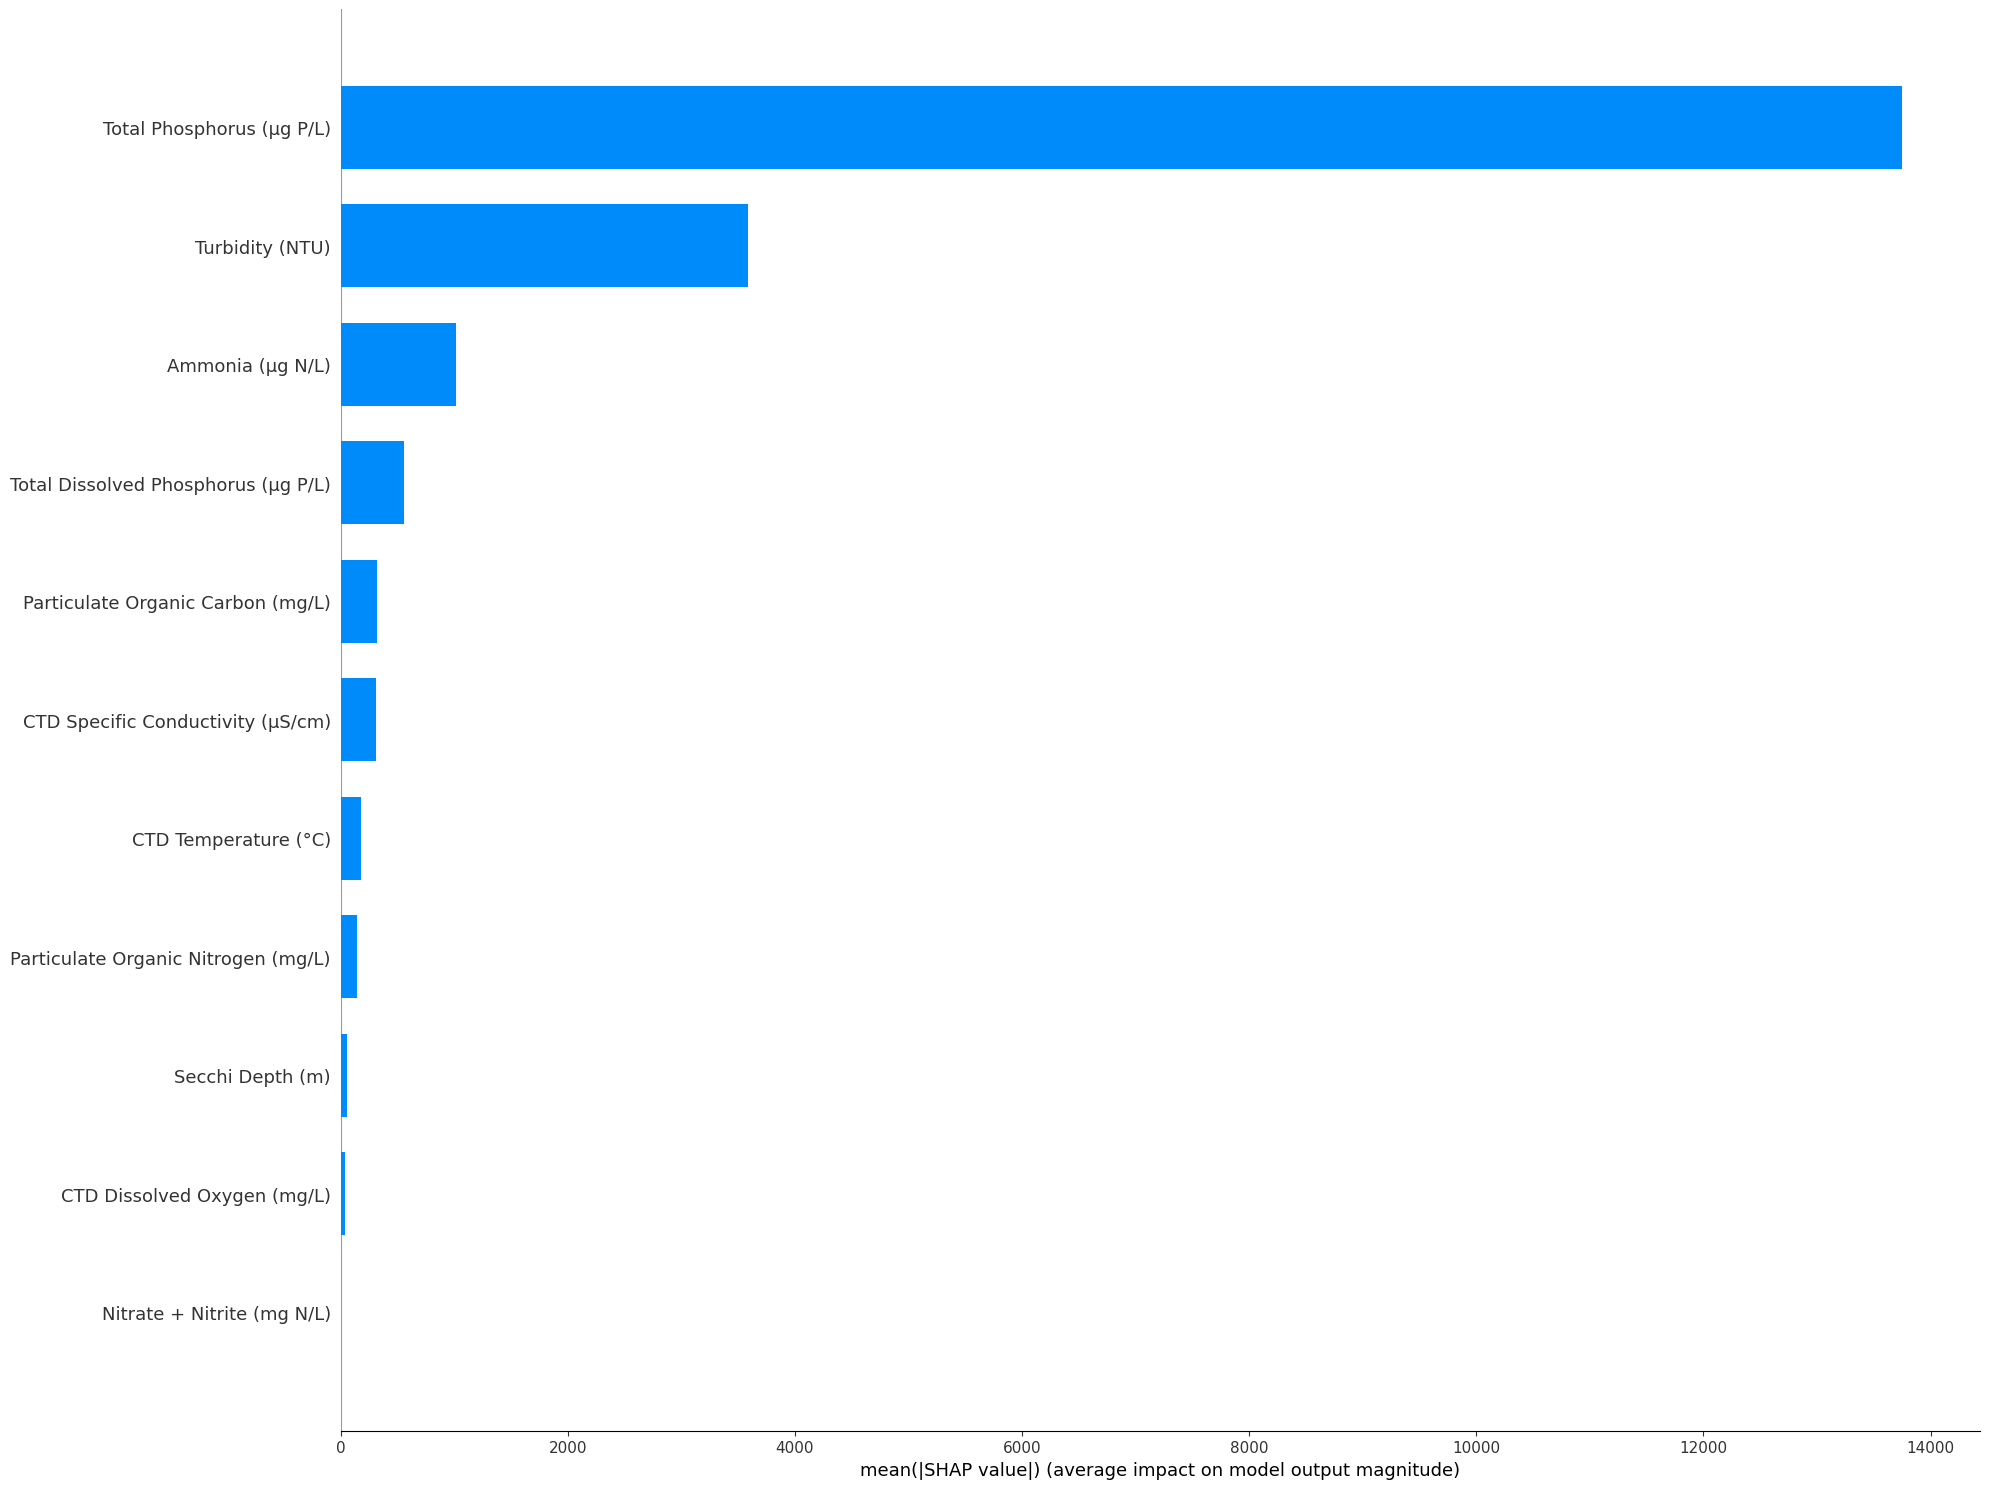

In [84]:
shap.summary_plot(values, X_test,feature_names = features,plot_type="bar",plot_size = (20,15),show=False)

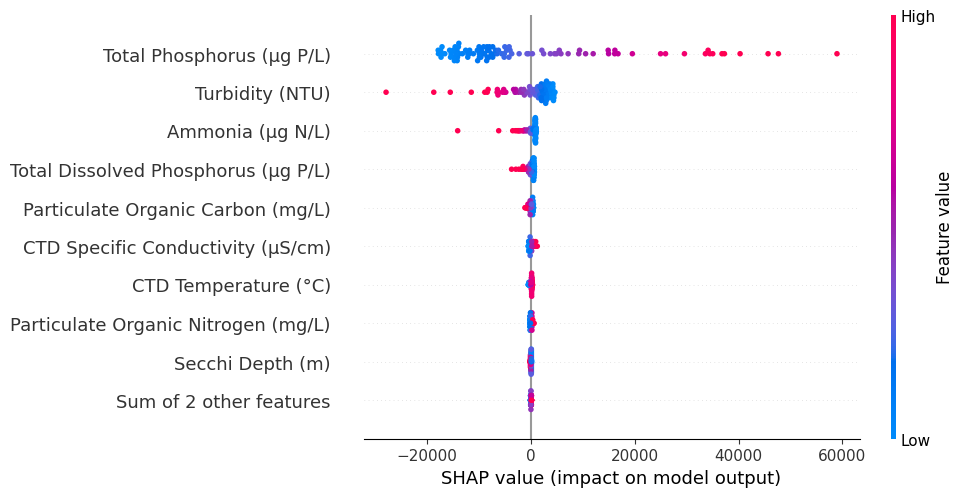

In [85]:
X_test_shap = pd.DataFrame(test.iloc[:,4:15])
shap_values = explainer(X_test_shap)
shap.plots.beeswarm(shap_values=shap_values)

In [86]:
import matplotlib.pyplot as plt

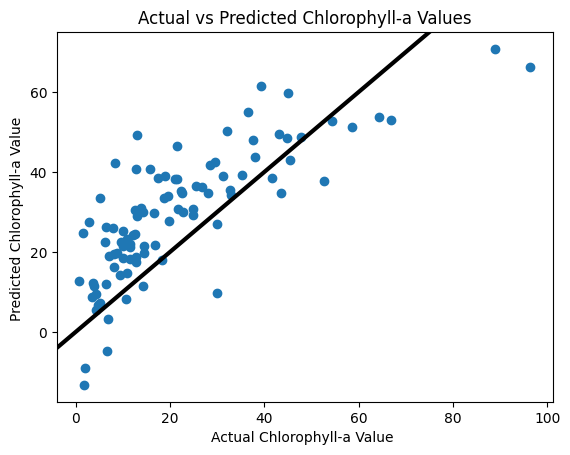

In [101]:
plt.scatter(Y_test, res)
plt.xlabel('Actual Chlorophyll-a Value ')
plt.ylabel('Predicted Chlorophyll-a Value ')
plt.title('Actual vs Predicted Chlorophyll-a Values')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='k', lw=3, scalex=False, scaley=False)
plt.show()

ValueError: x and y must be the same size

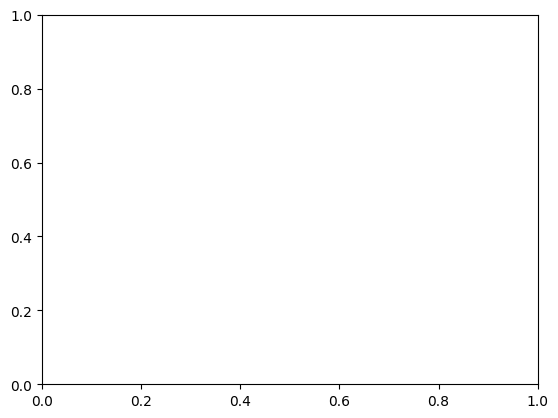

In [89]:
residuals = Y_test - res
plt.scatter(Y_test, residuals)
plt.xlabel('Predicted Petal Width')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()